<a href="https://colab.research.google.com/github/geoc1234/sourdough/blob/development/notebooks/growth%20Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ganzle, et al (1) found the growth rates of two strains of LAB and the c. milleri strain of yeast could be fit to:
$$\mu =  a \cdot x^b \cdot e^{-c \cdot x}\tag{1}$$

with parameters a, b, and c depending on the organism and $x = T_{max} - T$, with T in degrees C. It is helpful to plot the rate constants, $\mu$, for the individual species on top of each other.

<font size = "1">(1) APPLIED AND ENVIRONMENTAL MICROBIOLOGY,
July 1998, p. 2616–2623


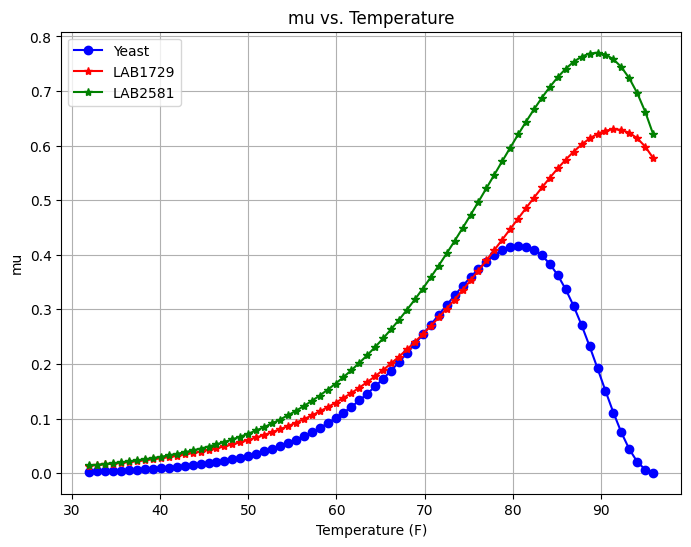

In [28]:
# @title
import matplotlib.pyplot as plt
import numpy as np

yeast = [0.029, 3.0, 0.34, 35.9, 0.42]
LAB1729 = [0.19, 1.5, 0.19, 41.0, 0.67]
LAB2581 = [0.097, 2.0, 0.22, 41.0, 0.71]

def mu(T, params):
    a, b, c, Tmax, mu_opt = params
    x = Tmax-T
    return mu_opt * a * x**b * np.exp(-c * x)

# Example data: Replace with your actual data
temperature_celsius = np.arange(0, yeast[3], 0.5) # in centigrade
temperature_fahrenheit = (temperature_celsius * 9/5) + 32 # Convert to Fahrenheit

mu_y = mu(temperature_celsius, yeast)
mu_l1 = mu(temperature_celsius, LAB1729)
mu_l2 = mu(temperature_celsius, LAB2581)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(temperature_fahrenheit, mu_y, marker='o', linestyle='-', color='b', label='Yeast')
plt.plot(temperature_fahrenheit, mu_l1, marker='*', linestyle='-', color='r', label='LAB1729')
plt.plot(temperature_fahrenheit, mu_l2, marker='*', linestyle='-', color='g', label='LAB2581')
plt.title('mu vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('mu')
plt.grid(True)
plt.legend()
plt.show()

One can see from the plots that, at essentially all values of T, the bacteria strains grow faster than the yeast. Next, we plot the rato of yeast to the faster growing bacteria strain (LAB2581).

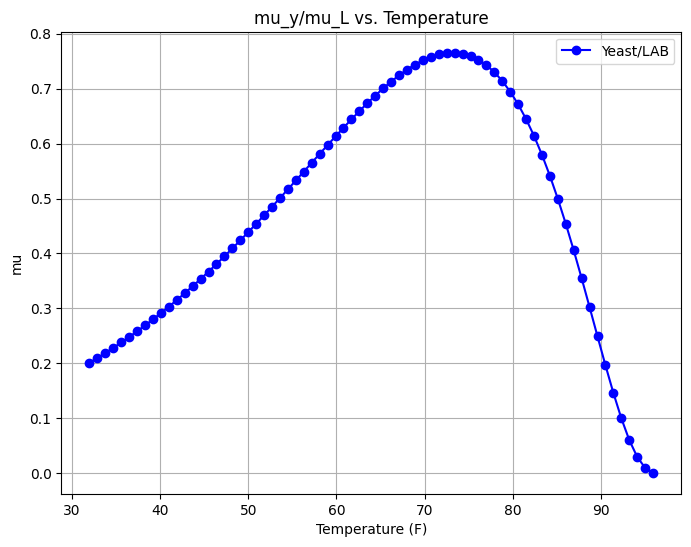

In [27]:
# @title
mu_y_LAB2581 = mu_y / mu_l2
# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(temperature_fahrenheit, mu_y_LAB2581, marker='o', linestyle='-', color='b', label='Yeast/LAB')
plt.title('mu_y/mu_L vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('mu')
plt.grid(True)
plt.legend()
plt.show()

The growth rate of the LAB bacteria is greater than that for yeast at all temperatures. That aside, the plot also shows yeast has it's highest growth rate relative to LAB at 74F, even though the yeast growth curve peaks at 80F.